In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
import nltk
nltk.download('punkt') 
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<class 'pandas.core.frame.DataFrame'>


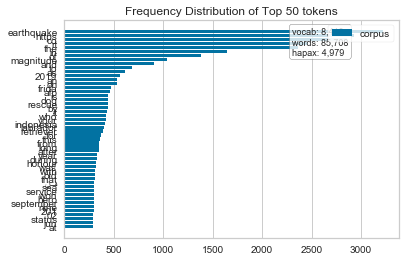

In [7]:
# loadning a file that I previously cleaned. There were 4 files, first (normative) with the most popular positive emotions(words)on twitter
#second (normative) with the most popular negative emotions(words)on twitter, third with tweets people tweet during an earthquake,
#fourth (combined)- it contained only the tweets that had the numeric indication of how many positive or negative emotions/words particular tweet contained (earthquakepn.p) 
 
corpus = pickle.load(open('earthquakepn.p', 'rb'))
print(type(corpus))

#print(corpus[0])
corpus = corpus[0].values.tolist() #trying to retrieve the names of the emotions in tweets(so far you can see the number of the emotions in tweet(earthquakepn.p))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(X)
visualizer.poof()

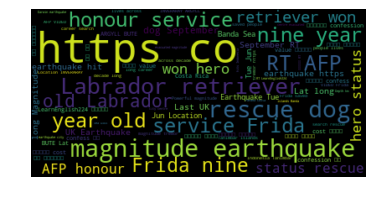

In [8]:
# generating  a bag of words or worldcloud
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

a = str()
for i in corpus:
    a += ''.join(i)

#print(a)

wordcloud = WordCloud(max_font_size=50, max_words=450, background_color="black").generate(a)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
with (open('./earthquake.p', 'rb')) as file:#read bites
    list_of_tweet = pickle.load(file)
    file.close()

In [10]:
negative = pd.read_csv("./negative.csv")
positive = pd.read_csv("./positive.csv")
tweetsdf = pd.DataFrame()

for tweet in list_of_tweet:
    tweetsdf = tweetsdf.append([tweet.text],ignore_index=True)


In [12]:
#print(tweetsdf[0].values.tolist())

In [13]:
corpus = str() # converting into a string so I could clean the corpus
for i in tweetsdf[0].values.tolist():
    corpus += ''.join(i)

import re  # cleaning in order to get the words only
corpus = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', corpus)
words = nltk.word_tokenize(corpus)
#print(words)
#link like the one here: //t.co/L3ysRKeMk5USGS' , were causing enormous problems

In [14]:
import string
table = str.maketrans('','', string.punctuation)# wanting to store unneeded language parts in a table
stripped = [w.translate(table) for w in words]
#print (stripped)

In [30]:
words = [word for word in words if len(word) > 3]
words = [word for word in words if not word.isnumeric()]
words = [word.lower() for word in words ]
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
arabic_stops = stopwords.words('Arabic') #I've seen too many Arabic words
words = [word for word in words if word not in arabic_stops]
words = [word for word in words if word not in all_stopwords]
fdist = nltk.FreqDist(words)
#for word, frequency in fdist.items():
    #print('{};{}'.format(word, frequency))

In [31]:
list_of_positive_words_from_tweets = list()
list_of_negative_words_from_tweets = list()
for item in positive['word']:
    if item in fdist:
        if '/' not in item:
            dict_pair = {item : int(fdist[item])}
            list_of_positive_words_from_tweets.append(dict_pair)

for item in negative['Word']:
    if item in fdist:
        if '/' not in item:
            dict_pair = {item : fdist[item]}
            list_of_negative_words_from_tweets.append(dict_pair)


#print(fdist['steve'])

def check_which_word_in_set(word):
    pass

In [32]:
#print(list_of_positive_words_from_tweets)

In [33]:
#print(list_of_negative_words_from_tweets)

In [34]:
# list_of_positive_words_from_tweets = [w for w in list_of_positive_words_from_tweets if type(w) == 'dict']
positive_sentence_to_visualization = str()
for item in list_of_positive_words_from_tweets:
   
    #print(item)
    # for k,v in item.item()
    
    # to range I would like to add item[k] but i got indicies error
    for k in item:
    
        for i in range(item[k]):
            positive_sentence_to_visualization += k + ','

In [35]:
#print(positive_sentence_to_visualization)



In [36]:
negative_sentence_to_visualization = str()
for item in list_of_negative_words_from_tweets:
    
    #print(item)
    # for k,v in item.item()
    
    # to range I would like to add item[k] but i got indicies error
    for k in item:
    
        for i in range(item[k]):
            negative_sentence_to_visualization += k + ','

In [37]:
#print(negative_sentence_to_visualization)


In [38]:
words_array = np.array(words) 
unique_words_array = np.unique(words_array)

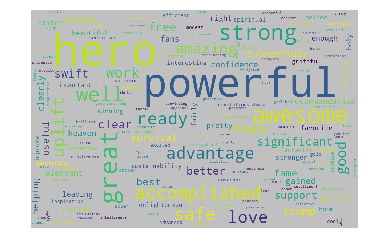

In [40]:
positive_cloud = WordCloud(max_font_size=120, width=900, height=600, background_color="silver", collocations=False).generate(positive_sentence_to_visualization)
negative_cloud = WordCloud(max_font_size=150, width=900, height=600, background_color="black", collocations=False).generate(negative_sentence_to_visualization)
collocations=False
plt.figure()
plt.imshow(positive_cloud)
positive_cloud.to_file("positive_cloud.png")
plt.axis("off")
plt.show()

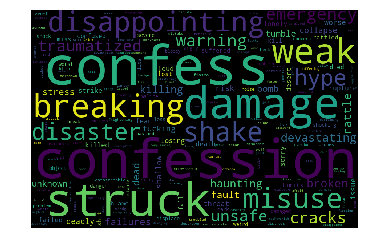

In [24]:
plt.figure()

plt.imshow(negative_cloud)
negative_cloud.to_file("negative_cloud.png")
plt.axis("off")
plt.show()

In [95]:
#source: https://www.datacamp.com/community/tutorials/wordcloud-python
#secondary source: stack overflow

In [ ]:
#things you may consider:  # print(type(item))
    # print(item.items()) in the line that top comment says: # list_of_positive_words_from_tweets = [w for w in list_of_positive_words_from_tweets if type(w) == 'dict']